In [127]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Part-A
Constraints
-----------
1. $p_1 = p^{init}$
2. $p_k = p^{des}$
3. $v_i = v_k = \left(0,0\right)$
4. $p_{i+1} = p_i + hv_i$
5. $v_{i+1} = v_i + (h/m)F_i$
6. $F = T^{left}(-sin(\theta), cos(\theta)) + T^{right}(sin(\theta), cos(\theta)) + mg$

Objective
---------
$\min\, 0$

Explanation
-----------
So our original objective is to minimise k. We formulate it as a feasibility problem and minimise a constant (say 0). the constraints are all convex



In [128]:
def solve(l: int, u: int):
    h = 0.1
    m = 0.1
    theta = np.pi/12 # 15 degrees
    i_max = (l+u)//2
    left = np.array([[-np.sin(theta),np.cos(theta)]])
    right = np.array([[np.sin(theta),np.cos(theta)]])
    g = np.array([np.array([0,-9.8]) for _ in range(i_max)])
    T_left = cp.Variable((i_max,1))
    T_right = cp.Variable((i_max,1))
    v = cp.Variable((i_max,2))
    F = cp.Variable((i_max,2))
    p = cp.Variable((i_max,2))
    p_init = np.array([0,0])
    p_des = np.array([10,2])
    constraints = []
    constraints.append(T_left <= 2)
    constraints.append(T_right <=2)
    constraints.append(T_left >= 0)
    constraints.append(T_right >=0)
    constraints.append(p[0] == p_init)  # starting point
    constraints.append(p[-1] == p_des)  # final destination
    constraints.append(v[0] == np.array([0,0])) # initial velocity
    constraints.append(v[-1] == np.array([0,0]))  # final velocity
    constraints.append(p[1:] == p[:-1] + h*v[:-1])
    constraints.append(F == cp.multiply(T_left,left)+cp.multiply(T_right, right)+m*g)
    constraints.append(v[1:] == v[:-1] + (h/m) * F[:-1])
    objective = cp.Minimize(0)
    prob = cp.Problem(objective, constraints)
    prob.solve()
    if u-l==0:
        print(prob.status)
        return u, T_left.value, T_right.value, p.value
    if prob.status == 'optimal':
        return solve(l,i_max)
    else:
        return solve(i_max+1,u)  

In [129]:
k, T_left, T_right, p = solve(0,100)

optimal


In [130]:
print(f'Minimum value of k is {k}')

Minimum value of k is 34


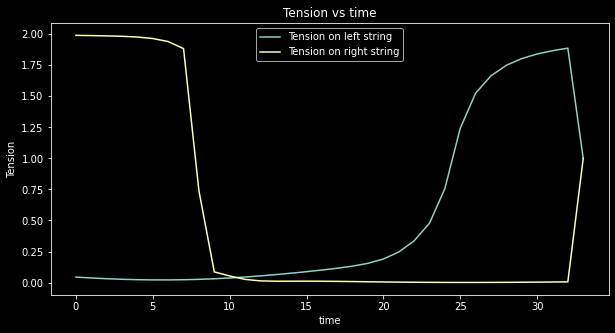

In [131]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(np.arange(k), T_left, label = "Tension on left string")
ax.plot(np.arange(k), T_right, label = "Tension on right string")
ax.legend(loc='best')
ax.set_title("Tension vs time")
ax.set_xlabel("time")
ax.set_ylabel("Tension")
plt.show()

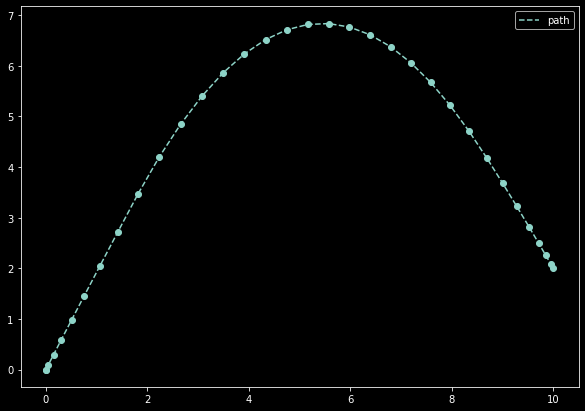

In [132]:
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(p[:,0], p[:,1])
ax.plot(p[:,0], p[:,1],'--' ,label = 'path')
ax.legend()
plt.show()